# Correlation r value for each voxel in the brain

In this exercise, we will take each voxel time course in the brain, and
calculate a correlation between the task-on / task-off vector and the voxel
time course. We then make a new 3D volume that contains correlation values for
each voxel.

In [1]:
# Our usual set-up
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Display array values to 4 digits of precision
np.set_printoptions(precision=4, suppress=True)

In [2]:
import nibabel as nib

Load the `ds114_sub009_t2r1.nii` image, and calculate the number of
volumes:

In [3]:
# Load the ds114_sub009_t2r1.nii image
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_fdata()

# Show shape
data.shape

(64, 64, 30, 173)

In [4]:
TR = 2.5  # time between volumes

Create a vector of ones and zeros, with one value for each scan. 1 means the
scan was during the activation block, and 0 means the scan was during a rest
block.


In [5]:
#- Make new zero vector for neural prediction
neural_prediction = np.zeros(img.shape[-1])
#- Read the file into an array called "task".
#- "task" should have 3 columns (onset, duration, amplitude)
task = np.loadtxt('ds114_sub009_t2r1_cond.txt')
#- Select first two columns and divide by TR
ons_durs = task[:, :2] / TR
#- Fill in values of 1 for positions of on blocks in time course
# Convert onsets, durations to integers first
ons_durs = np.round(ons_durs).astype(int)
for onset, duration in ons_durs:
    neural_prediction[onset:onset + duration] = 1

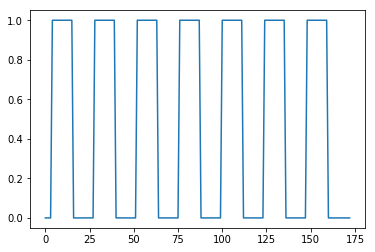

In [6]:
# Plot the on-off values for each volume
plt.plot(neural_prediction);

Using slicing, drop the first volume, and the corresponding on-off
value.  This is to drop the T1 artifact in the first scan.

In [7]:
# Drop the first 4 volumes, and corresponding on-off values
data = data[:, :, :, 1:]
neural_prediction = neural_prediction[1:]

The shape of an individual volume in the FMRI time-series:

In [8]:
# Make array to hold the correlation values
volume_shape = data.shape[:-1]
volume_shape

(64, 64, 30)

Make a single brain-volume-sized array of all zero to hold the
correlations:

In [9]:
# Make array to hold the correlation values
correlations = np.zeros(volume_shape)

-   Loop over all voxel indices on the first, then second, then third
    dimension.
-   Extract the voxel time courses at each voxel coordinate in the image.
-   Get the correlation between the voxel time course and neural prediction.
-   Fill in the value in the correlations array.

In [10]:
# Loop over all voxel indices
for i_index in range(volume_shape[0]):
    for j_index in range(volume_shape[1]):
        for k_index in range(volume_shape[2]):
            # Extract the voxel time courses at each voxel
            time_course = data[i_index, j_index, k_index, :]
            if np.all(time_course) == 0:
                continue  # All zeros in time course, go to next voxel
            # Get correlation value for voxel time course with on-off vector
            cc = np.corrcoef(neural_prediction, time_course)[1, 0]
            # Fill value in the correlations array
            correlations[i_index, j_index, k_index] = cc

Plot the middle slice of the third axis from the correlations array. Can
you see any sign of activity (high correlation) in the frontal lobe?

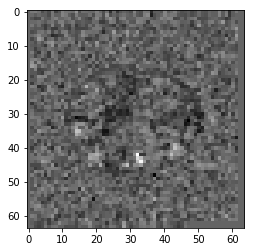

In [11]:
# Plot the 20th slice of the correlation image
plt.imshow(correlations[:, :, 19], cmap='gray');